<a href="https://colab.research.google.com/github/Arjun-R-krishnan/ABC_Company_Analysis/blob/main/ABC_Company_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [ ]:
# Google Sheets CSV export link
url = "https://docs.google.com/spreadsheets/d/1VP9BE_eI2yl6uUHSm4mGiiwjRdoqCqnkcIjsv5Q2ex4/export?format=csv&gid=1454563709"

In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv(url)

In [ ]:
# Display the first few rows
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


## Preprocessing
Correct the data in the height column by replacing it with random numbers between 150 and 180

In [ ]:
# Generate random integer values for the 'Height' column
df['Height'] =  np.random.randint(150, 181, df.shape[0])

In [ ]:
# Display the first 5 rows of the DataFrame 'df'
df.head(5)

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,172,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,167,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,153,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,163,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,167,231,NaN,5000000.0


Checking consistency of data

In [ ]:
# Display a concise summary of the DataFrame 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int64  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 32.3+ KB


In [ ]:
# Calculate the total number of missing (null) values in each column of the DataFrame 'df'
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,84
Salary,11


There are null values in the column 'College' and 'Salary'

In [ ]:
# Replacing the null values in the column 'College' to 'Unknown'
df['College'].fillna('Unknown',inplace = True)

<ipython-input-9-2efe15d4b679>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['College'].fillna('Unknown',inplace = True)


Given that the null values in the salary column are of integer type and their proportion is negligible compared to the total dataset, removing these null values will not significantly impact the integrity of the dataset

In [ ]:
# Removing the null values from column 'Salary'
df = df.dropna(subset=['Salary'])

In [ ]:
#checking for null values
df.isnull().sum()

,0
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,0
Salary,0


## The dataset has been thoroughly cleaned and is now prepared for analysis

## Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [ ]:
# finding the total no of emloyees by counting the no of rows of the dataset
toal_no_employees = df.shape[0]
toal_no_employees

447

In [ ]:
# Analyzing the distribution of employees across each team using the groupby function
team_employee_count = df.groupby('Team').size().reset_index(name='No_of_Employees')

In [ ]:
#This DataFrame displays the team names along with the corresponding employee count
team_employee_count

,Team,No_of_Employees
0,Atlanta Hawks,15
1,Boston Celtics,14
2,Brooklyn Nets,15
3,Charlotte Hornets,15
4,Chicago Bulls,15
5,Cleveland Cavaliers,14
6,Dallas Mavericks,15
7,Denver Nuggets,14
8,Detroit Pistons,15
9,Golden State Warriors,15


In [ ]:
# To calculate the percentage of employees across each team, a new column labeled 'Percentage' is being added
team_employee_count['Percentage'] = (team_employee_count['No_of_Employees']/toal_no_employees * 100)

In [ ]:
# This dataframe shows the 'Team name' , 'No of employees' and  'Percentage split across each team
team_employee_count

,Team,No_of_Employees,Percentage
0,Atlanta Hawks,15,3.355705
1,Boston Celtics,14,3.131991
2,Brooklyn Nets,15,3.355705
3,Charlotte Hornets,15,3.355705
4,Chicago Bulls,15,3.355705
5,Cleveland Cavaliers,14,3.131991
6,Dallas Mavericks,15,3.355705
7,Denver Nuggets,14,3.131991
8,Detroit Pistons,15,3.355705
9,Golden State Warriors,15,3.355705


## Graphical representation of the derived insights

### A bar plot is used to represent the number of employees in each team, with the number of employees on the y-axis and the teams on the x-axis

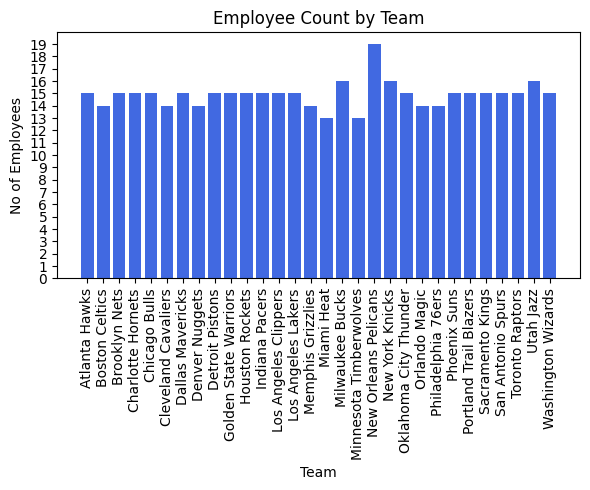

In [ ]:
plt.figure(figsize=(6, 5))
plt.bar(team_employee_count['Team'], team_employee_count['No_of_Employees'],color='royalblue')
plt.title('Employee Count by Team')
plt.xlabel('Team')
plt.ylabel('No of Employees')
plt.xticks(rotation=90)
plt.yticks(range(0,max(team_employee_count['No_of_Employees']+1)))
plt.tight_layout()
plt.show()

### A pie chart is used to visualize the distribution of employees across different teams

In [ ]:
# Normalize the 'Percentage' values to a range between 0 and 1, to map them to the colormap
percentage_color_pick = (team_employee_count['Percentage'] - team_employee_count['Percentage'].min()) / (team_employee_count['Percentage'].max() - team_employee_count['Percentage'].min())
# Select colors from the 'Blues' colormap based on the percentage values for the pie chart
colors1 = plt.cm.Blues(percentage_color_pick)

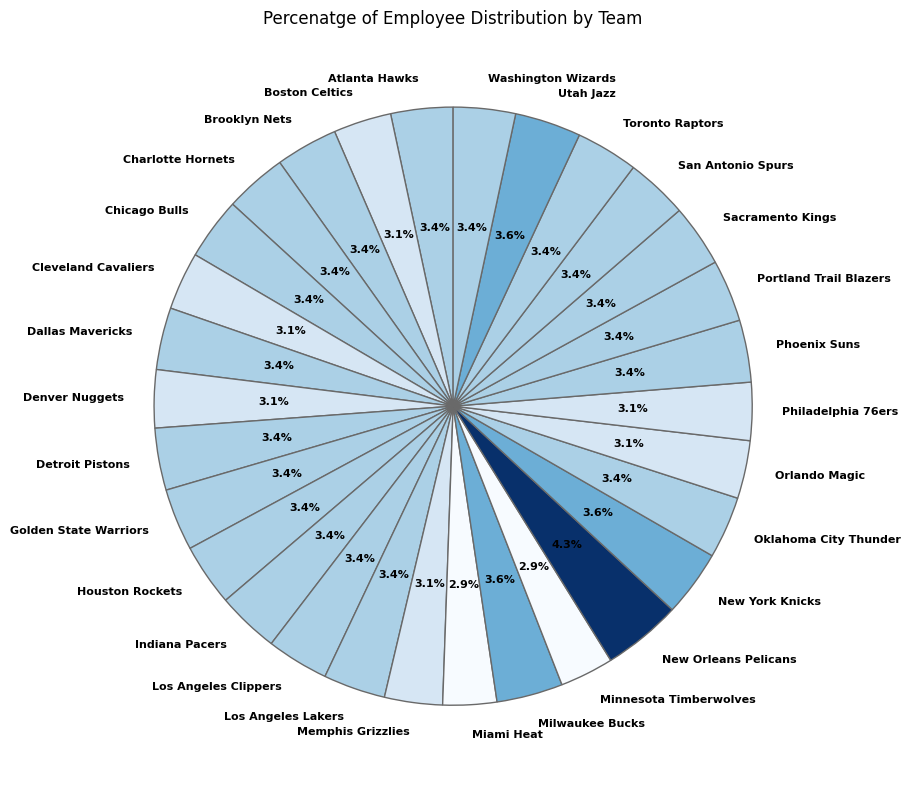

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(team_employee_count['Percentage'], labels = team_employee_count['Team'],autopct='%1.1f%%', startangle=90,textprops={'fontsize': 8, 'fontweight': 'bold'},colors=colors1,wedgeprops={'edgecolor': 'dimgrey'})
plt.title('Percenatge of Employee Distribution by Team')
plt.tight_layout()
plt.show()

By utilizing a custom color palette, the distribution across each team becomes easier to interpret. Darker shades represent higher values, while lighter shades indicate lower values.

## Segregate employees based on their positions within the company

In [ ]:
# Creating a new DataFrame using the groupby function that consists of positions and the corresponding number of employees in each position
employee_position_count = df.groupby('Position').size().reset_index(name='No_of_Employees')

In [ ]:
employee_position_count

,Position,No_of_Employees
0,C,79
1,PF,97
2,PG,88
3,SF,84
4,SG,99


In [ ]:
# Adding a column named percentage based on the percentage of employee distribution across various positions
employee_position_count['Percentage']= (employee_position_count['No_of_Employees']/toal_no_employees * 100)

In [ ]:
employee_position_count

,Position,No_of_Employees,Percentage
0,C,79,17.673378
1,PF,97,21.700224
2,PG,88,19.686801
3,SF,84,18.791946
4,SG,99,22.147651


### A bar plot is used to represent the number of employees in each position, with the number of employees on the y-axis and the Position on the x-axis

In [ ]:
# Creating a custom color palette to plot the charts
colors2 = plt.cm.Pastel1(range(len(employee_position_count['Position'])))

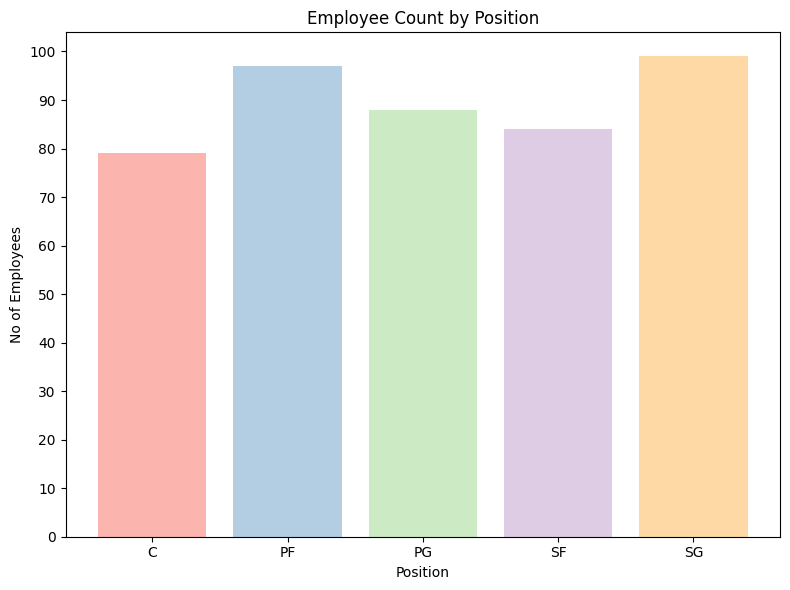

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(employee_position_count['Position'], employee_position_count['No_of_Employees'],color=colors2)
plt.title('Employee Count by Position')
plt.xlabel('Position')
plt.ylabel('No of Employees')
plt.xticks()
plt.yticks(range(0,max(employee_position_count['No_of_Employees']+10),10))
plt.tight_layout()
plt.show()

### A pie chart is used to visualize the distribution of employees across different positions

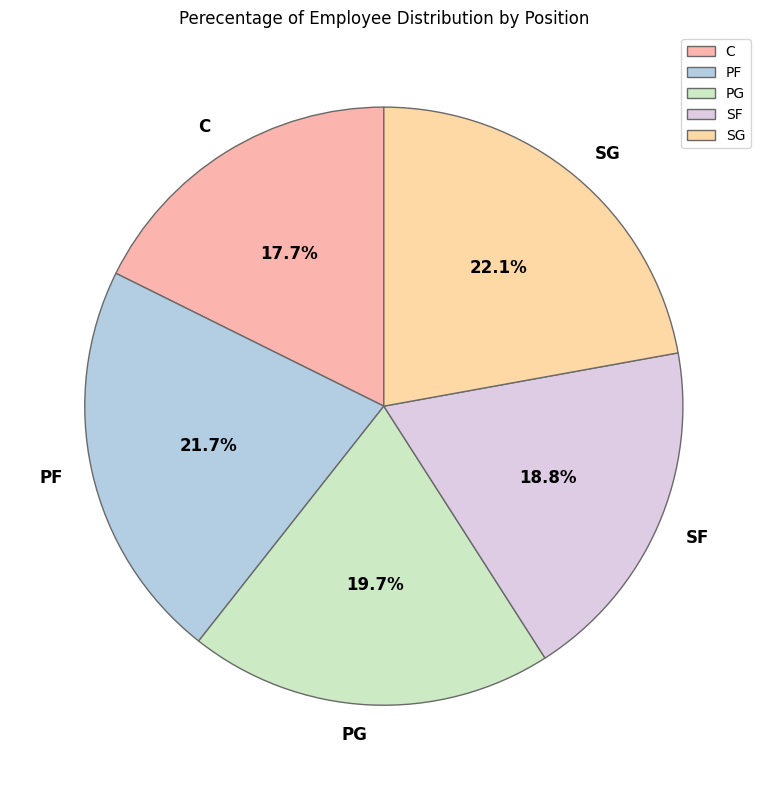

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(employee_position_count['Percentage'], labels = employee_position_count['Position'],autopct='%1.1f%%', startangle=90,textprops={'fontsize': 12, 'fontweight': 'bold'},colors=colors2,wedgeprops={'edgecolor': 'dimgrey'})
plt.title('Perecentage of Employee Distribution by Position')
plt.legend()
plt.tight_layout()
plt.show()


## Identify the predominant age group among employees

In [ ]:
# Creating a new dataframe based no of employess and their age
employee_age = df.groupby('Age').size().reset_index(name='No_of_Employees')

In [ ]:
employee_age

,Age,No_of_Employees
0,19,2
1,20,19
2,21,19
3,22,26
4,23,39
5,24,45
6,25,45
7,26,36
8,27,40
9,28,30


### From the data, we observe that employees span various age groups with slight differences. To facilitate analysis, we will categorize the employees into new age groups with a range of 5 years.

In [ ]:
# Define the age bins for categorization (ages are in years)
age_bins = [18,25,30,35,40,50]
# Define labels for the age groups corresponding to the bins
age_labels = ['18-24','25-29','30-34','35-40','40+']
# Create a new column 'Age_Group' in the employee_age DataFrame by categorizing ages
# The pd.cut function is used to segment the 'Age' column into specified bins
# 'right=False' means that the rightmost edge of each bin is not included in that bin
employee_age['Age_Group'] = pd.cut(employee_age['Age'], bins=age_bins, labels=age_labels, right=False)

In [ ]:
employee_age

,Age,No_of_Employees,Age_Group
0,19,2,18-24
1,20,19,18-24
2,21,19,18-24
3,22,26,18-24
4,23,39,18-24
5,24,45,18-24
6,25,45,25-29
7,26,36,25-29
8,27,40,25-29
9,28,30,25-29


In [ ]:
# It creates a new DataFrame with the age groups and their corresponding total employee counts
age_group = employee_age.groupby('Age_Group')['No_of_Employees'].sum().reset_index()

<ipython-input-31-c3966ebb91f9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group = employee_age.groupby('Age_Group')['No_of_Employees'].sum().reset_index()


In [ ]:
age_group

,Age_Group,No_of_Employees
0,18-24,150
1,25-29,178
2,30-34,89
3,35-40,27
4,40+,3


## Graphical representation of the derived insights

### A bar plot is used to represent the number of employees in each age , with the number of employees on the y-axis and the age on the x-axis

In [ ]:
# Find the maximum value in the 'No_of_Employees' column of the employee_age DataFrame
max_value = employee_age['No_of_Employees'].max()
# Define two colors: a dark color for the maximum value and a light color for others
dark_color  = '#056312'   # Dark color for the maximum value
light_color = '#92de9c'   # Light color for all other values
# Create a list of colors based on whether the value in 'No_of_Employees' is the maximum
age_colors=[dark_color if val == max_value else light_color for val in  employee_age['No_of_Employees']]

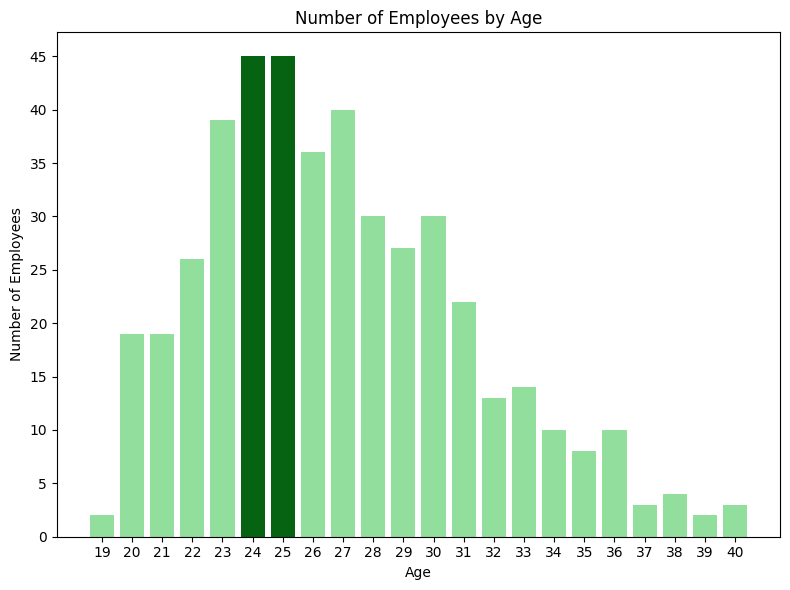

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(employee_age['Age'], employee_age['No_of_Employees'], color=age_colors)
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.xticks(employee_age['Age'])
plt.yticks(range(0,max(employee_age['Age'])+10,5))
plt.title('Number of Employees by Age')
plt.tight_layout()
plt.show()


## Creating a pie chart to visualize the distribution of employees across predominant age groups

In [ ]:
#creating a custom color palatte to analyze the pie chart of age group
age_group_color_pick = (age_group['No_of_Employees'] - age_group['No_of_Employees'].min()) / (age_group['No_of_Employees'].max() - age_group['No_of_Employees'].min())
age_group_colors = plt.cm.Greens(age_group_color_pick)

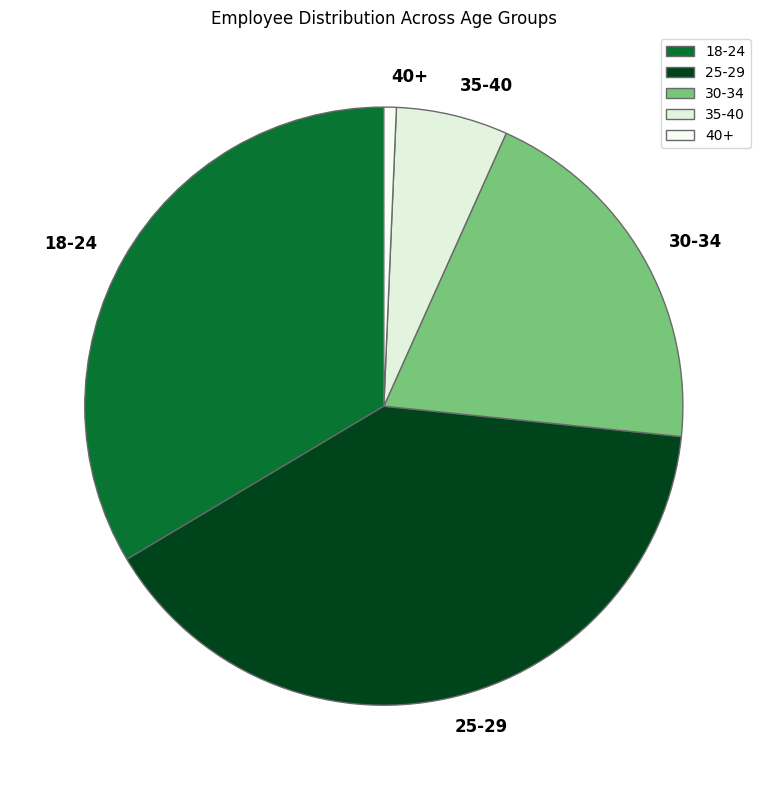

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(age_group['No_of_Employees'], labels = age_group['Age_Group'], startangle=90,textprops={'fontsize': 12, 'fontweight': 'bold'},colors=age_group_colors,wedgeprops={'edgecolor': 'dimgrey'})
plt.title('Employee Distribution Across Age Groups')
plt.legend()
plt.tight_layout()
plt.show()

##  Discover which team and position have the highest salary expenditure.

### Creating a dataset which includes all the teams and their salary expenditure

In [ ]:
# Group the DataFrame `df` by the 'Team' column and sum the 'Salary' for each team.
team_salary = df.groupby('Team')['Salary'].sum().reset_index()

In [ ]:
team_salary

,Team,Salary
0,Atlanta Hawks,72902950.0
1,Boston Celtics,58541068.0
2,Brooklyn Nets,52528475.0
3,Charlotte Hornets,78340920.0
4,Chicago Bulls,86783378.0
5,Cleveland Cavaliers,106988689.0
6,Dallas Mavericks,71198732.0
7,Denver Nuggets,60121930.0
8,Detroit Pistons,67168263.0
9,Golden State Warriors,88868997.0


In [ ]:
# Find the highest salary value in the 'Salary' column
highest_team_salary = team_salary['Salary'].max()
print(f"The highest salary expendiure by any team is {highest_team_salary}")

The highest salary expendiure by any team is 106988689.0


In [ ]:
# Find the team with the highest salary
team_with_highest_salary = team_salary[team_salary['Salary'] == highest_team_salary]['Team'].values[0]
print(f"The Team with highest salary expenditure is {team_with_highest_salary}")

The Team with highest salary expenditure is Cleveland Cavaliers


### Visualizing Team Salary Expenditure: A bar plot is created to represent the salary distribution across different teams, with 'Team' on the x-axis and 'Total Salary Expenditure' on the y-axi

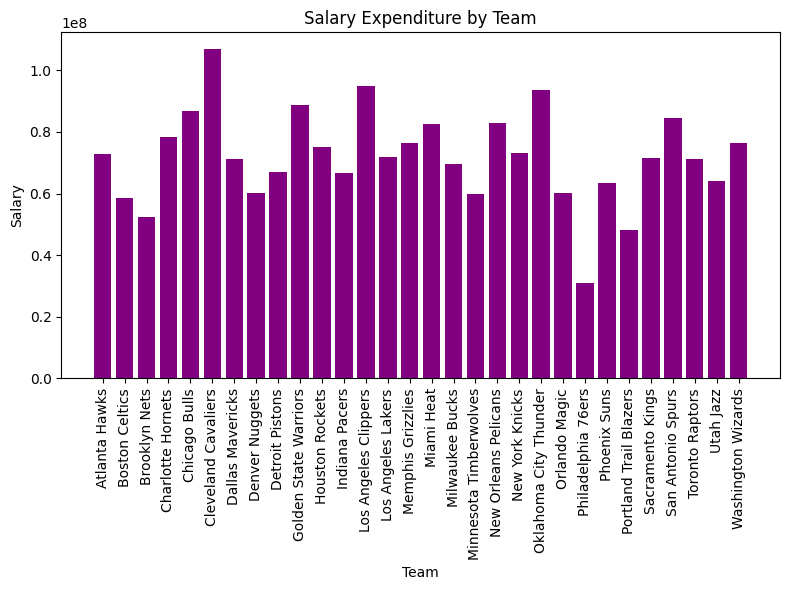

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(team_salary['Team'], team_salary['Salary'], color='purple')
plt.xlabel('Team')
plt.ylabel('Salary')
plt.xticks(team_salary['Team'],rotation= 90)
plt.yticks()
plt.title('Salary Expenditure by Team')
plt.tight_layout()
plt.show()

### Creating a dataset which includes all the positions and their salary expenditure

In [ ]:
# Group the DataFrame `df` by the 'Team' column and sum the 'Salary' for each team.
position_salary = df.groupby('Position')['Salary'].sum().reset_index()

In [ ]:
position_salary

,Position,Salary
0,C,466377332.0
1,PF,442560850.0
2,PG,446848971.0
3,SF,408020976.0
4,SG,396976258.0


In [ ]:
# Find the highest salary value in the 'Salary' column
highest_position_salary = position_salary['Salary'].max()
print(f"The highest salary expendiure by any team is {highest_position_salary}")

The highest salary expendiure by any team is 466377332.0


In [ ]:
# Find the position with the highest salary
position_with_highest_salary = position_salary[position_salary['Salary'] == highest_position_salary]['Position'].values[0]
print(f"The Team with highest salary expenditure is {position_with_highest_salary}")

The Team with highest salary expenditure is C


In [ ]:
# Normalize the 'Salary' values in the DataFrame 'position_salary'
salary_group_color_pick = (position_salary['Salary'] - position_salary['Salary'].min()) / (position_salary['Salary'].max() - position_salary['Salary'].min())+1
# Generate colors using the 'Purples' colormap from matplotlib based on the normalized salary values
salary_group_colors = plt.cm.Purples(age_group_color_pick)

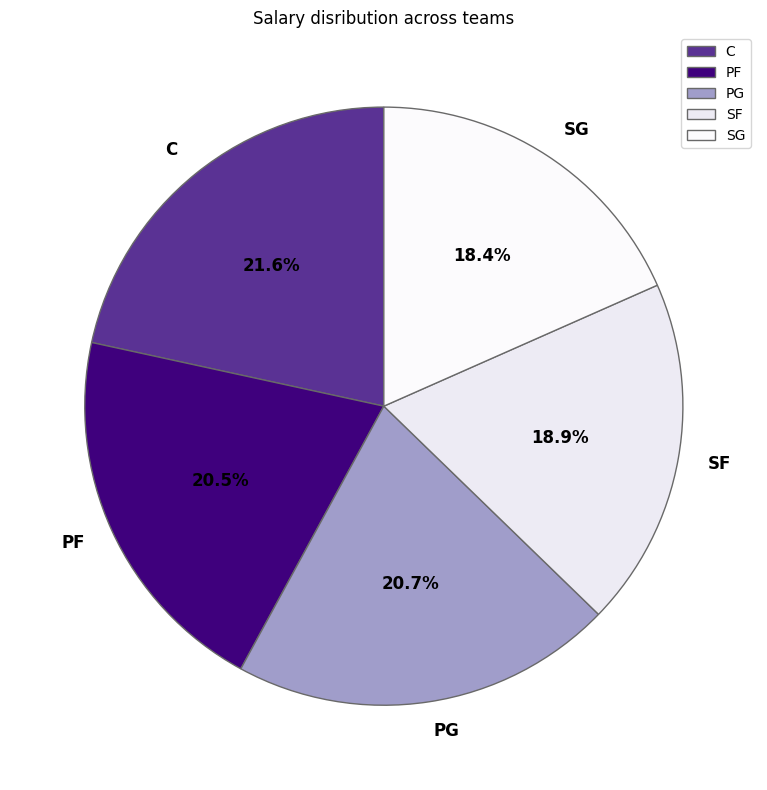

In [ ]:
plt.figure(figsize=(10,8))
plt.pie(position_salary['Salary'], labels = position_salary['Position'], autopct='%1.1f%%',startangle=90,textprops={'fontsize': 12, 'fontweight': 'bold'},colors=salary_group_colors,wedgeprops={'edgecolor': 'dimgrey'})
plt.title('Salary disribution across teams')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Group the DataFrame 'df' by 'Team' and 'Position'
team_position_salary = df.groupby(['Team', 'Position'])['Salary'].sum().reset_index()

In [ ]:
team_position_salary

,Team,Position,Salary
0,Atlanta Hawks,C,22756250.0
1,Atlanta Hawks,PF,23952268.0
2,Atlanta Hawks,PG,9763400.0
3,Atlanta Hawks,SF,6000000.0
4,Atlanta Hawks,SG,10431032.0
...,...,...,...
144,Washington Wizards,C,24490429.0
145,Washington Wizards,PF,11300000.0
146,Washington Wizards,PG,18022415.0
147,Washington Wizards,SF,11158800.0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

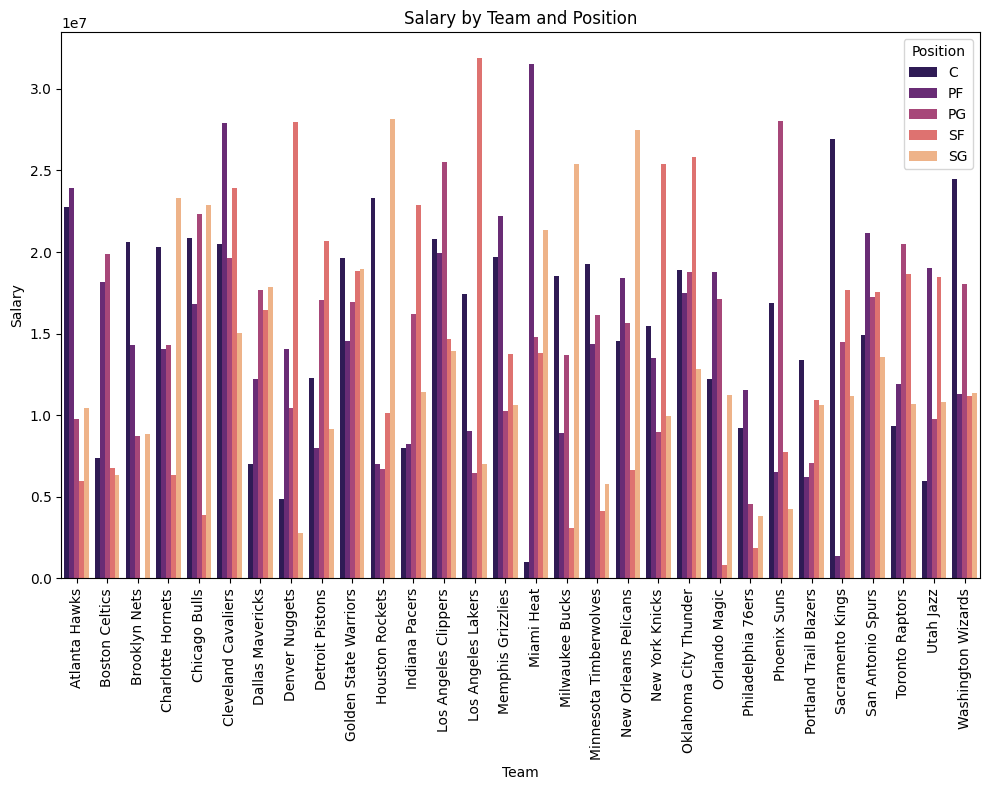

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Team', y='Salary', hue='Position', data=team_position_salary,palette='magma')
plt.xticks(rotation=90)
plt.xlabel('Team')
plt.ylabel('Salary')
plt.title('Salary by Team and Position')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate Salary per Employee and format it to two decimal places
position_salary['Salary_per_Employee'] = (position_salary['Salary'] / employee_position_count['No_of_Employees'])

In [ ]:
position_salary

,Position,Salary,Salary_per_Employee
0,C,466377332.0,5.903511e+06
1,PF,442560850.0,4.562483e+06
2,PG,446848971.0,5.077829e+06
3,SF,408020976.0,4.857393e+06
4,SG,396976258.0,4.009861e+06


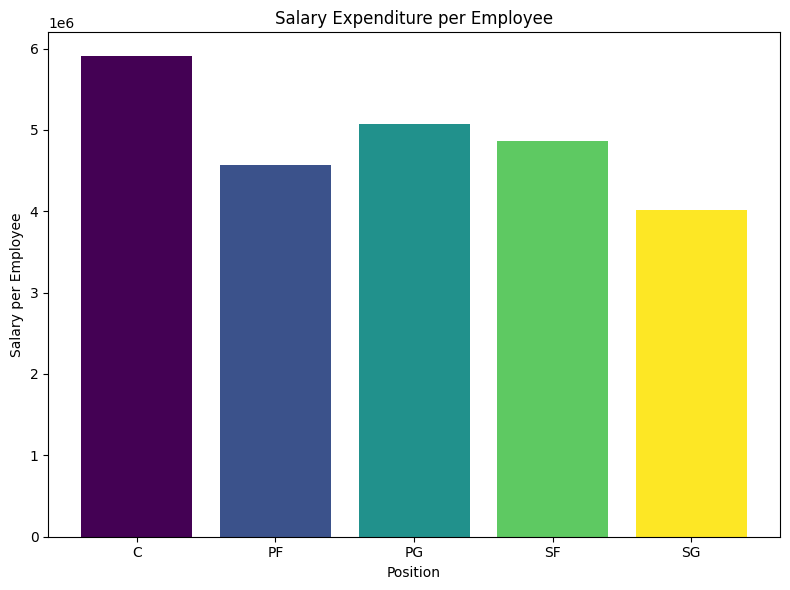

In [ ]:
plt.figure(figsize=(8,6))
plt.bar(position_salary['Position'], position_salary['Salary_per_Employee'],color=plt.cm.viridis(np.linspace(0, 1, len(position_salary['Salary']))))
plt.xlabel('Position')
plt.ylabel('Salary per Employee')
plt.xticks(position_salary['Position'])
plt.yticks()
plt.title('Salary Expenditure per Employee')
plt.tight_layout()
plt.show()

## Investigate if there's any correlation between age and salary, and represent it visually

In [ ]:
# Calculate the correlation matrix for the 'Age' and 'Salary' columns in the DataFrame 'df'
correlaion =  df[['Age','Salary']].corr()

In [ ]:
correlaion

,Age,Salary
Age,1.000000,0.214009
Salary,0.214009,1.000000


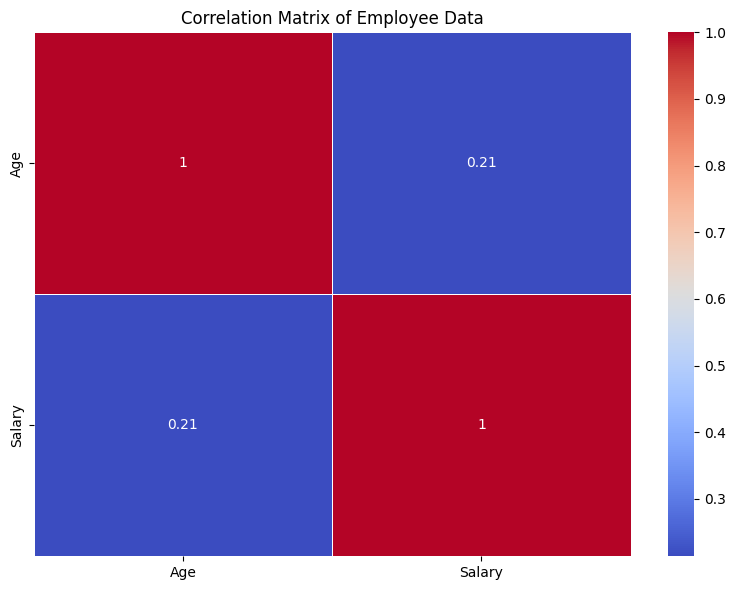

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlaion, annot=True, cmap='coolwarm', linewidths=0.4)
plt.title('Correlation Matrix of Employee Data')
plt.tight_layout()
plt.show()

In [ ]:
print("The correlation coefficient between Age and Salary is 0.214009\nA correlation coefficient of 0.214009 indicates a weak positive correlation between age and salary. This suggests that, as age increases, salary tends to increase slightly as well, but the relationship is not strong")

The correlation coefficient between Age and Salary is 0.214009
A correlation coefficient of 0.214009 indicates a weak positive correlation between age and salary. This suggests that, as age increases, salary tends to increase slightly as well, but the relationship is not strong


# DATA STORY

This dataset represents ABC Company, containing 458 rows and 9 columns.

## Here’s a brief story based on  teams and their number of employees



The Team Landscape of the NBA
In the bustling world of the NBA, each franchise not only competes for championship titles but also fosters a diverse team of employees who contribute to the organization's success. The dataset reveals insights into the workforce of various teams, showcasing the Atlanta Hawks leading the pack with 15 employees, closely followed by several other franchises, including the Boston Celtics, Brooklyn Nets, Charlotte Hornets, and more—all maintaining a solid workforce of 15 employees each.

While most teams hover around the 15-employee mark, notable exceptions stand out. The Milwaukee Bucks and New York Knicks have slightly larger teams with 16 employees, while the New Orleans Pelicans boast the highest number with 19 employees, indicating their commitment to a well-rounded support structure.

On the flip side, the Miami Heat and Minnesota Timberwolves have the smallest teams, with 13 employees each. Despite their smaller size, these teams are just as dedicated to their mission, focusing on efficiency and teamwork to achieve their goals.

## Employee Distribution by Position


The dataset highlights the distribution of employees across five basketball positions: Center (C), Power Forward (PF), Point Guard (PG), Small Forward (SF), and Shooting Guard (SG).

The Shooting Guard (SG) position has the largest number of employees, with 99 individuals in this role. This indicates the importance of this position in teams, as shooting guards are often crucial in both scoring and defense.

Power Forward (PF) is the next most populous position, with 97 employees, showing its key role in both offensive plays and defensive rebounds.

Point Guard (PG) follows closely with 88 employees, emphasizing its central role in leading the team and managing the flow of the game.

Small Forward (SF) has 84 employees, typically versatile players capable of contributing to both offense and defense.

Lastly, the Center (C) position, often known for its dominance in the paint, has 79 employees, rounding out the team structure.

## Employee Distribution by Age Group


The 25-29 age group has the highest number of employees, with 178 individuals, indicating that the workforce is primarily made up of young professionals in their mid-to-late twenties.

The 18-24 age group follows closely with 150 employees, showing that a significant portion of the workforce is in the early stages of their careers.

The number of employees begins to decline as age increases, with 89 employees in the 30-34 age group. This reflects a gradual reduction in workforce size among individuals in their thirties.

The 35-40 age group has only 27 employees, and the 40+ group is the smallest, with just 3 employees, suggesting that the company has a relatively young workforce, with fewer older employees.

## Team Salary Overview


The Cleveland Cavaliers lead the salary rankings with a total of $106,988,689, demonstrating their substantial financial investment in player contracts.

The Los Angeles Clippers and Oklahoma City Thunder also rank high, with salaries of $94,854,640 and $93,765,298, respectively. These teams are likely investing in high-profile talent to stay competitive.

On the lower end, the Philadelphia 76ers have the smallest salary expense at $30,992,894, which could indicate a focus on younger players or a rebuilding phase for the franchise.

The majority of teams, including the Golden State Warriors ($88,868,997), Chicago Bulls ($86,783,378), and San Antonio Spurs ($84,442,733), fall within the mid-to-high salary range, suggesting a competitive balance across the league.

## Salary Distribution by Position

Centers (C) have the highest total salary at $466,377,332, highlighting the importance of big men in the NBA for their contributions in defense, rebounding, and scoring in the paint.

Point Guards (PG) come in second with $446,848,971 in total salary. As the primary playmakers and leaders on the court, point guards are crucial for orchestrating the offense.

Power Forwards (PF) are close behind with $442,560,850, indicating that this position plays a key role in both offensive and defensive strategies, particularly in rebounding and inside scoring.

Small Forwards (SF) account for $408,020,976 in salaries, emphasizing the value of versatile players who can impact the game in multiple ways, including shooting, defense, and facilitating plays.

Shooting Guards (SG) have the lowest total salary at $396,976,258, but this still reflects a substantial investment in players who are often relied on for scoring and perimeter defense.

## Salary and Salary Per Employee by Position


Centers (C) not only have the highest total salary at $466,377,332, but also lead in salary per employee, with an average of $5.9 million per player. This underscores the premium placed on this position, likely due to the scarcity and impact of dominant big men in the league.

Point Guards (PG) follow closely behind, with a total salary of $446,848,971 and an average salary per employee of $5.08 million. As key playmakers, their value to a team's offense is reflected in their high compensation.

Power Forwards (PF), with a total salary of $442,560,850, have an average salary per employee of $4.56 million, showing their importance in both offensive and defensive contributions, especially in the paint and on the boards.

Small Forwards (SF) account for $408,020,976 in total salary, with an average salary of $4.86 million per player. This reflects the versatility of small forwards, who often contribute to both scoring and defense.

Shooting Guards (SG) have the lowest total salary at $396,976,258 and an average salary per employee of $4.01 million. While they earn less on average compared to other positions, shooting guards play a critical role in perimeter scoring and defense.

## Correlation Between Age and Salary


The correlation coefficient between Age and Salary is 0.214, indicating a weak positive correlation. This means that as age increases, salary tends to increase slightly, but the relationship is not very strong

# Insights Gained

This snapshot of the NBA's workforce highlights the diverse approaches teams take to build their organizations. Each franchise’s structure reflects its unique identity, strategy, and aspirations as they all strive for greatness on and off the court.

This distribution reflects the tactical importance and specialization of each position in basketball, with the shooting guard and power forward roles being particularly significant in this dataset

This distribution highlights a concentration of employees in their twenties, indicating that the company may be geared towards younger professionals, with fewer older or more experienced workers.

Overall, this salary distribution reflects the varying financial strategies employed by different NBA teams, with some investing heavily in star players and others possibly focusing on cost management or development of younger talent.

This salary distribution suggests that while all positions are highly valued in the NBA, centers and point guards command the largest financial investments, likely due to their pivotal roles in team dynamics.

This data indicates that centers and point guards are the highest-paid positions on a per-employee basis, reflecting their pivotal roles on the court. The remaining positions also command significant salaries, highlighting the financial investment teams make in building well-rounded rosters

The weak positive correlation suggests that salary increases with age, but other factors likely play a more significant role in determining salary levels.
Factors such as experience, performance, or position may be more influential in driving salary variations than age alone.